## Using `StandardScaler` Module to Do DataProcessing

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

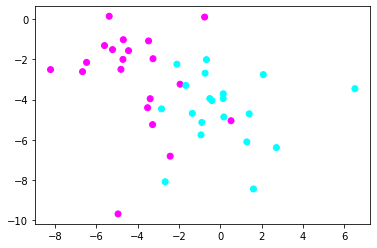

In [2]:
x,y = make_blobs(n_samples=40, centers=2,random_state=50,cluster_std=2)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.cool)
plt.show()

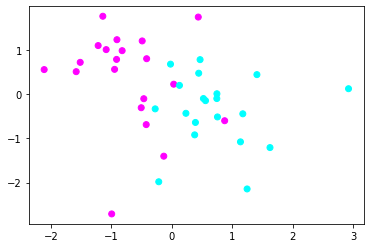

In [3]:
from sklearn.preprocessing import StandardScaler
x_1 = StandardScaler().fit_transform(x)
plt.scatter(x_1[:,0],x_1[:,1],c=y,cmap=plt.cm.cool)
plt.show()

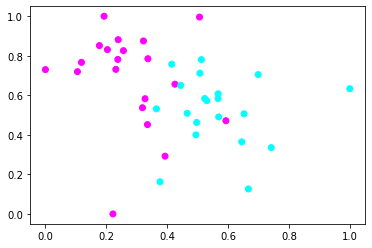

In [4]:
from sklearn.preprocessing import MinMaxScaler
x_2 = MinMaxScaler().fit_transform(x)
plt.scatter(x_2[:,0],x_2[:,1],c=y,cmap=plt.cm.cool)
plt.show()

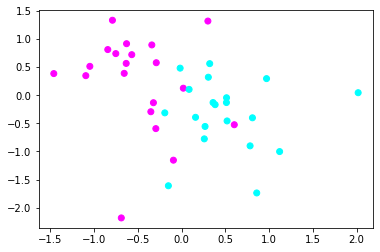

In [5]:
from sklearn.preprocessing import RobustScaler
x_3 = RobustScaler().fit_transform(x)
plt.scatter(x_3[:,0],x_3[:,1],c=y,cmap=plt.cm.cool)
plt.show()

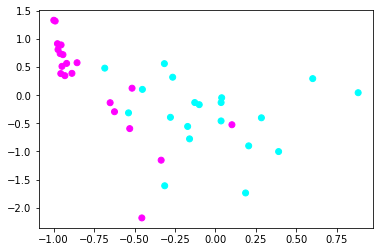

In [6]:
from sklearn.preprocessing import Normalizer
x_4 = Normalizer().fit_transform(x)
plt.scatter(x_4[:,0],x_3[:,1],c=y,cmap=plt.cm.cool)
plt.show()

## Raise Correction Rate via Data Processing

In [7]:
from sklearn.datasets import load_wine
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
wine = load_wine()
x_train, x_test,y_train,y_test=train_test_split(wine.data, wine.target, random_state=62)
x_train.shape, x_test.shape

((133, 13), (45, 13))

In [8]:
mlp=MLPClassifier(hidden_layer_sizes=[100,100],max_iter=400,random_state=62)
mlp.fit(x_train,y_train)
mlp.score(x_test, y_test)

D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9333333333333333

In [9]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_pp=scaler.transform(x_train)
x_test_pp=scaler.transform(x_test)
mlp.fit(x_train_pp, y_train)
mlp.score(x_test_pp, y_test)

1.0

## Principal Component Analysis With Python 

In [10]:
x, y = wine.data, wine.target
x_scaled=StandardScaler().fit_transform(x)
x_scaled.shape

(178, 13)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
x_pca.shape

(178, 2)

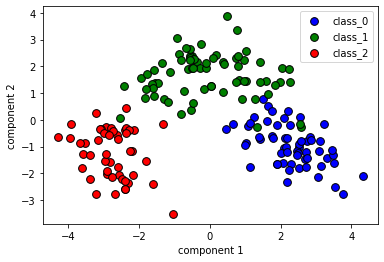

In [12]:
x_0 = x_pca[wine.target==0]
x_1 = x_pca[wine.target==1]
x_2 = x_pca[wine.target==2]
plt.scatter(x_0[:,0],x_0[:,1],c='b',s=60,edgecolors='k')
plt.scatter(x_1[:,0],x_1[:,1],c='g',s=60,edgecolors='k')
plt.scatter(x_2[:,0],x_2[:,1],c='r',s=60,edgecolors='k')
plt.legend(wine.target_names, loc='best')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

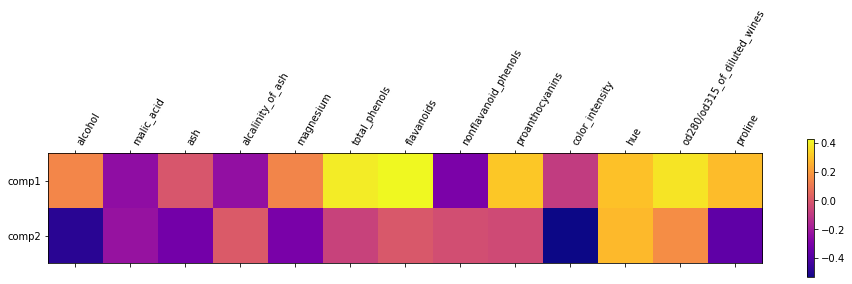

In [13]:
plt.matshow(pca.components_,cmap='plasma')
plt.yticks([0,1],['comp1', 'comp2'])
plt.colorbar()
plt.xticks(range(len(wine.feature_names)),wine.feature_names, rotation=60,ha='left')
plt.show()

## Non-Negative Matrix Factorization

In [14]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, random_state=62).fit(x_train)
x_train_nmf = nmf.transform(x_train)
x_test_nmf = nmf.transform(x_test)
x_train_nmf.shape

(133, 2)

## Clustering: K-means & 凝聚聚类 & DBSCAN聚类

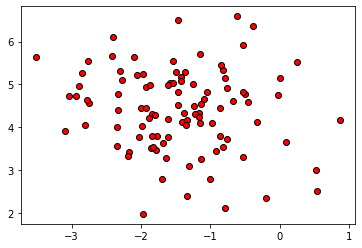

In [16]:
blobs = make_blobs(random_state=1, centers=1)
x_blobs = blobs[0]
plt.scatter(x_blobs[:,0], x_blobs[:,1],c='r',edgecolors='k')
plt.show()

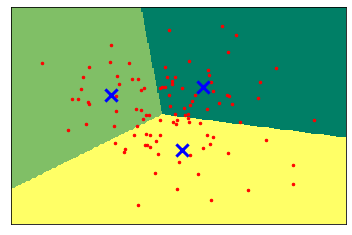

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_blobs)
x_min, x_max = x_blobs[:,0].min()-0.5,x_blobs[:,0].max()+0.5
y_min, y_max = x_blobs[:,1].min()-0.5,x_blobs[:,1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(z, interpolation='nearest', extent=(xx.min(), xx.max(),yy.min(),yy.max()), cmap= plt.cm.summer,aspect='auto', origin='lower')
plt.plot(x_blobs[:,0], x_blobs[:,1], 'r.', markersize=5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150,linewidths=3,color='b',zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [19]:
kmeans.labels_

array([2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1,
       0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0,
       1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2])

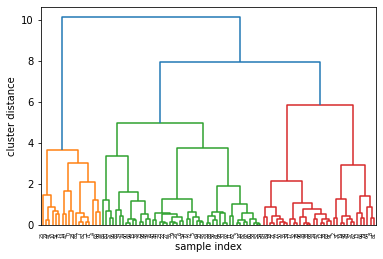

In [20]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage = ward(x_blobs)
dendrogram(linkage)
ax = plt.gca()
plt.xlabel("sample index")
plt.ylabel("cluster distance")
plt.show()

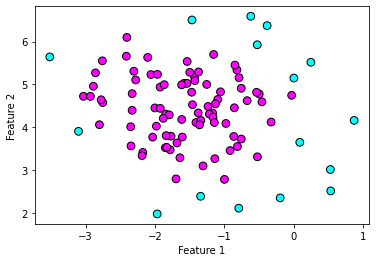

In [21]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
clusters = db.fit_predict(x_blobs)
plt.scatter(x_blobs[:,0],x_blobs[:,1],c=clusters, cmap=plt.cm.cool,s=60,edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [22]:
clusters

array([-1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1],
      dtype=int64)

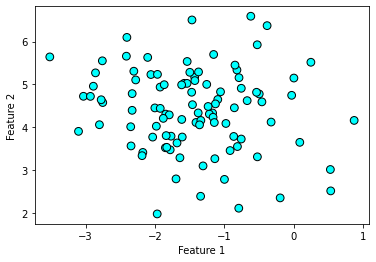

In [23]:
db_1 =DBSCAN(eps=2)
clusters_1 = db_1.fit_predict(x_blobs)
plt.scatter(x_blobs[:,0],x_blobs[:,1],c=clusters_1, cmap=plt.cm.cool,s=60,edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

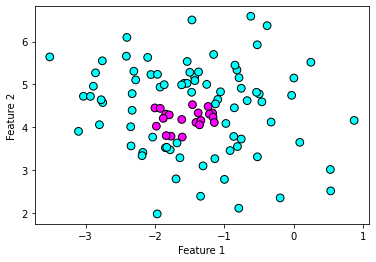

In [24]:
db_2 =DBSCAN(min_samples=20)
clusters_2 = db_2.fit_predict(x_blobs)
plt.scatter(x_blobs[:,0],x_blobs[:,1],c=clusters_2, cmap=plt.cm.cool,s=60,edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()